In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LPLDataset import FileModulatedPoissonGroup, get_random_signal

In [46]:
import os
def mk_folder(folder_name):

    current_directory = os.getcwd()

    path = os.path.join(current_directory, folder_name)

    if not os.path.exists(path):
        os.makedirs(path)  
        print(f"Folder '{folder_name}' created in {current_directory}")

In [47]:
mk_folder('rates')
mk_folder('spks')
mk_folder('outs')

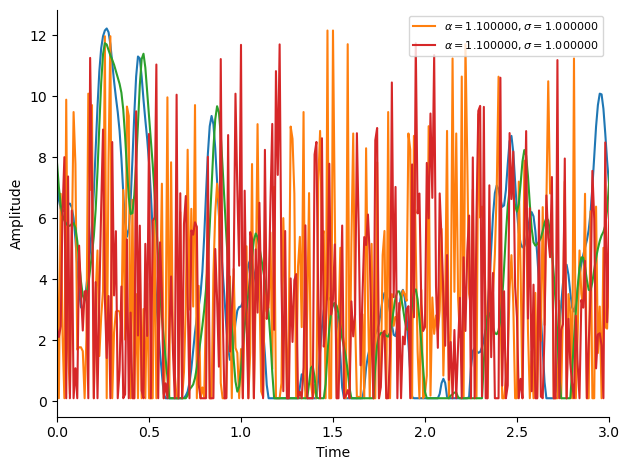

In [103]:
folder_name='rates'

baserate = 5.0
amplitude = 4.0
basename = "rates"

#Make rates0.dat with constant firing rate
duration = 100.0
with open("%s/%dhz_rates0.dat"%(folder_name, int(baserate)),'w') as fp:
    fp.write("0 %e\n"%baserate)
    fp.write("%e %e\n"%(duration,baserate))
    
plt.figure()
filecount = 1



# Make periodic slow signals and controls
alphas = [1.1, 1.1]
multipliers = [1.0, 1.0]
period = [3.0, 3.0 + 1/13]
for k in range(len(alphas)):
    times,signal = get_random_signal(period=period[k],alpha=alphas[k],dt=10e-3)
    values = np.clip(multipliers[k]*amplitude*signal+baserate,0.1,np.inf)
    with open("%s/%dhz_%s%i.dat"%(folder_name,int(baserate),basename,filecount),'w') as fp:
        for p in zip(times,values):
            fp.write("%e %e\n"%p)
    plt.plot(times,values)
    filecount += 1  

    # Make shuffle control
    np.random.shuffle(values)
    with open("%s/%dhz_%s%i.dat"%(folder_name,int(baserate),basename,filecount),'w') as fp:
        for p in zip(times,values):
            fp.write("%e %e\n"%p)
    plt.plot(times,values,label=r'$\alpha=%f,\sigma=%f$'%(alphas[k],multipliers[k]))
    filecount += 1


# Plot connectivity for visual inspection
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0,3.0))
plt.legend(fontsize=8)
plt.tight_layout()
sns.despine()
plt.savefig("%s/%dhz_rates.pdf"%(folder_name,int(baserate)))

In [104]:
dt = 2e-3
rates_file_path_list = [
    "rates/%dhz_rates0.dat"%(int(baserate)),
    "rates/%dhz_rates1.dat"%(int(baserate)),
    "rates/%dhz_rates2.dat"%(int(baserate)),
    "rates/%dhz_rates3.dat"%(int(baserate)),
    "rates/%dhz_rates4.dat"%(int(baserate)),
] 
spikes_file_path1 = "spks/%dhz_spikes_10000s_2.ras"%(int(baserate))
spikes_file_path2 = "spks/%dhz_spikes_100s_2.ras"%(int(baserate))
duration1 = 10000
duration2 = 100
print(rates_file_path_list)

['rates/3hz_rates0.dat', 'rates/3hz_rates1.dat', 'rates/3hz_rates2.dat', 'rates/3hz_rates3.dat', 'rates/3hz_rates4.dat']


In [105]:
input_spikes = FileModulatedPoissonGroup(time_step=dt)
input_spikes.mk_spikes(rates_file_path_list, spikes_file_path1, time=duration1, neurons=100)
input_spikes.mk_spikes(rates_file_path_list, spikes_file_path2, time=duration2, neurons=100)


In [101]:
data = np.loadtxt(spikes_file_path2)
size = (int)(data.shape[0]/(100.0/10.0))
times = data[len(data) - size:, 0]  
neuron_ids = data[len(data) - size:, 1]

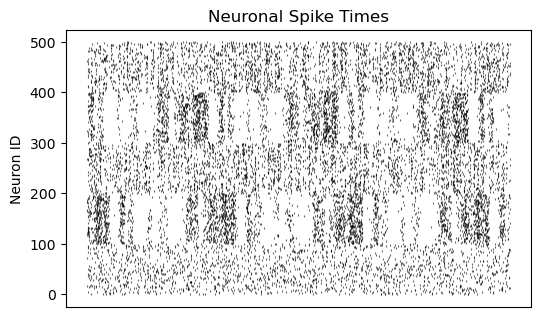

In [102]:
marker_size = 1.0
lw = 0.8
alpha = 0.6
plt.figure(figsize=(6, 3.6))  
plt.scatter(times, neuron_ids, marker='|', s=marker_size, alpha=alpha, linewidths=lw, c='black')  

plt.title('Neuronal Spike Times')  
plt.xlabel('Time (s)')  
plt.ylabel('Neuron ID')  
plt.grid(False)  
ax = plt.gca()
ax.xaxis.set_visible(False)   

plt.show()